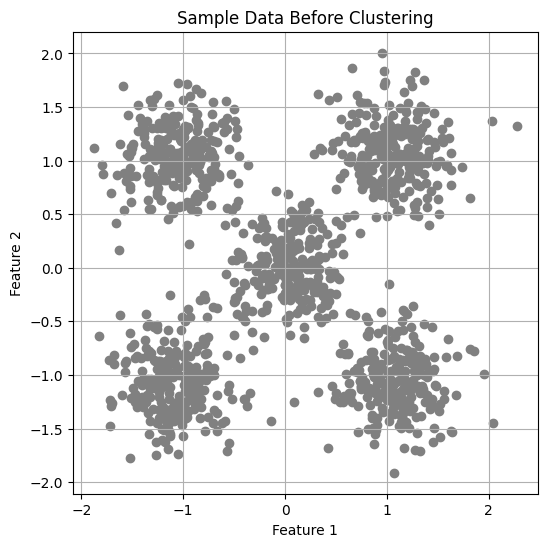

In [1]:
# ====================== Initial ===============================
# Step 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate sample data
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [0, 0]]
X, _ = make_blobs(n_samples= 1250, centers=centers, cluster_std=0.55,
random_state=2)
X = StandardScaler().fit_transform(X)
# Plotting before clustering
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='gray', marker='o')
plt.title('Sample Data Before Clustering')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
# ===========================================================

Kmean values =  483.1583005930533


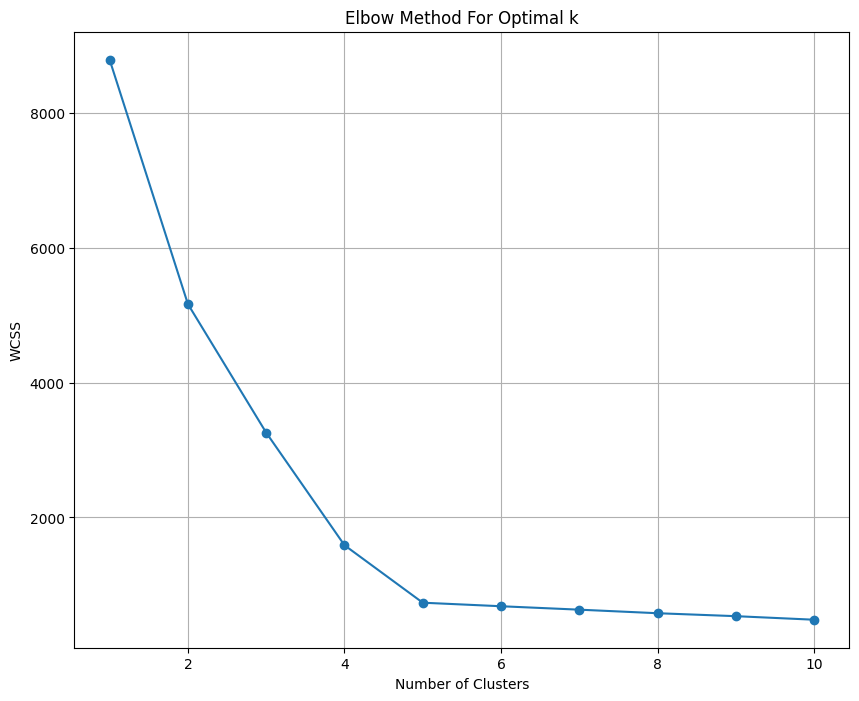

In [2]:
# Step 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=1250, centers=centers, cluster_std=0.55, random_state=2)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the model

print("Kmean values = ",kmeans.inertia_)
# Plotting the WCSS to observe the 'Elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


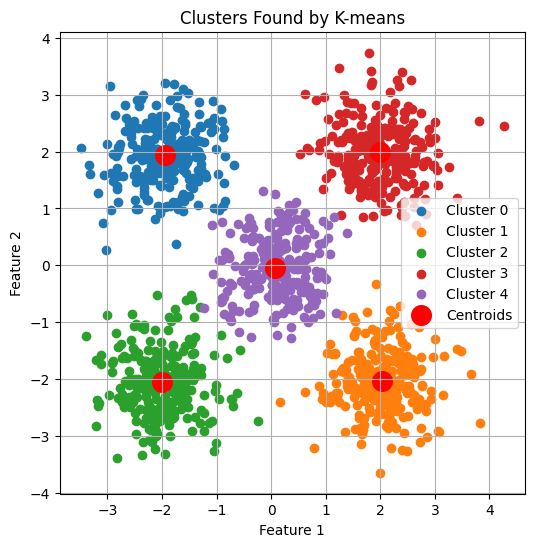

In [36]:
# step 3
optimal_k = 5  # Replace with the observed optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotting clusters
plt.figure(figsize=(6, 6))
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters Found by K-means')
plt.legend()
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


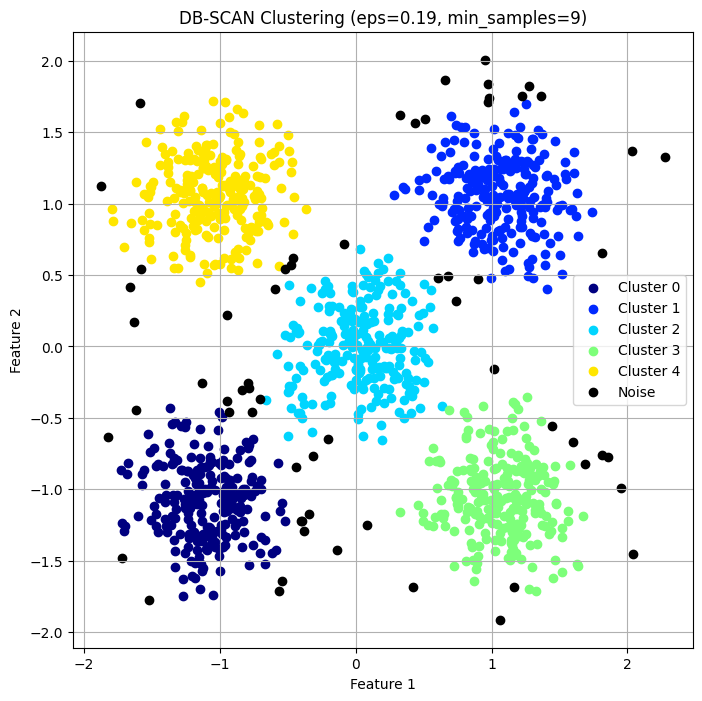

In [37]:
# step 4
from sklearn.cluster import DBSCAN

# Step 1: Generate Sample Data
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [0, 0]]
X, _ = make_blobs(n_samples=1250, centers=centers, cluster_std=0.55, random_state=2)
X = StandardScaler().fit_transform(X)

# Step 2: Apply DB-SCAN Algorithm
eps = 0.19  # Epsilon parameter
min_samples = 9  # Minimum number of points to form a dense region

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = db.labels_

# Identify unique clusters
unique_labels = set(labels)

# Step 3: Visualize DB-SCAN Clustering Results
plt.figure(figsize=(8, 8))

# Plot each cluster
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'black'
        label_name = 'Noise'
    else:
        # Use a colormap for clusters
        color = plt.cm.jet(float(label) / len(unique_labels))
        label_name = f'Cluster {label}'

    # Plot points for the current cluster
    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                color=color, label=label_name, marker='o')

plt.title(f'DB-SCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.legend()
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [38]:
# Number of clusters found by DB-SCAN (excluding noise)
num_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = list(labels).count(-1)

print(f"Number of clusters found by DB-SCAN: {num_clusters_dbscan}")
print(f"Number of noise points identified: {num_noise_points}")

# Compare K-means clusters and DB-SCAN clusters
optimal_k = 5  # Replace with the actual optimal k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Evaluate clustering consistency
print(f"Number of clusters found by K-means: {optimal_k}")


Number of clusters found by DB-SCAN: 5
Number of noise points identified: 63
Number of clusters found by K-means: 5
